 STEP 1: Load the MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Reshape to fit model input
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [5]:
# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

 STEP 2: Train a Basic Neural Network (NN)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8728 - loss: 0.4481 - val_accuracy: 0.9647 - val_loss: 0.1167
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9650 - loss: 0.1155 - val_accuracy: 0.9728 - val_loss: 0.0915
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9779 - loss: 0.0741 - val_accuracy: 0.9757 - val_loss: 0.0833
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0528 - val_accuracy: 0.9745 - val_loss: 0.0951
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9767 - val_loss: 0.0892


In [11]:

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9697 - loss: 0.1000
Test Accuracy: 0.972599983215332


STEP 3: Test the Model with Sample Images

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Predict on sample test image
sample = x_test[0].reshape(1, 784)
prediction = model.predict(sample)
predicted_digit = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


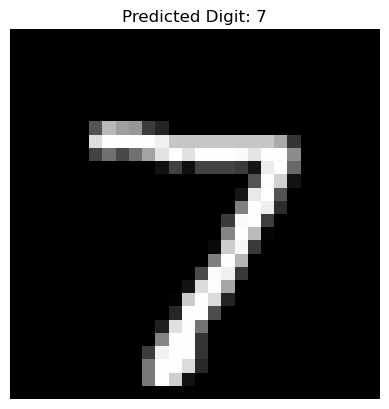

In [15]:
# Plot
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()

⭐ BONUS: GUI with Tkinter to Draw and Predict Digits

In [72]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps, ImageGrab, Image
import numpy as np

class DigitRecognizer:
    def __init__(self, model):
        self.model = model
        self.window = tk.Tk()
        self.window.title("Digit Recognizer")

        self.canvas = tk.Canvas(self.window, width=200, height=200, bg='white')
        self.canvas.pack()

        self.button_predict = tk.Button(self.window, text="Predict", command=self.predict)
        self.button_predict.pack()

        self.button_clear = tk.Button(self.window, text="Clear", command=self.clear)
        self.button_clear.pack()

        self.label_result = tk.Label(self.window, text="Draw a digit", font=("Arial", 16))
        self.label_result.pack()

        self.canvas.bind("<B1-Motion>", self.draw)

        self.image1 = Image.new("L", (200, 200), 'white')
        self.draw_instance = ImageDraw.Draw(self.image1)

        self.window.mainloop()

    def draw(self, event):
        x, y = event.x, event.y
        r = 8
        self.canvas.create_oval(x - r, y - r, x + r, y + r, fill='black')
        self.draw_instance.ellipse([x - r, y - r, x + r, y + r], fill='black')

    def clear(self):
        self.canvas.delete("all")
        self.draw_instance.rectangle([0, 0, 200, 200], fill='white')
        self.label_result.config(text="Draw a digit")

    def predict(self):
        # Get the canvas position and crop the image
        x = self.canvas.winfo_rootx()
        y = self.canvas.winfo_rooty()
        x1 = x + self.canvas.winfo_width()
        y1 = y + self.canvas.winfo_height()

        # Grab the canvas area as image
        img = ImageGrab.grab().crop((x, y, x1, y1)).convert('L')
        img = img.resize((28, 28))

        # Invert the image
        img = ImageOps.invert(img)

        # Convert to numpy array and normalize
        img_array = np.array(img).astype('float32') / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        # Predict digit
        prediction = self.model.predict(img_array)
        digit = np.argmax(prediction)

        # Show result
        self.label_result.config(text=f"Predicted: {digit}")
        print("Predicted digit:", digit)



In [73]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,774 (854.59 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,388 (427.30 KB)

In [77]:
DigitRecognizer(model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 5


Optional: Save and Load Model

In [40]:
# Save
model.save("digit_classifier.keras")

# Load
from tensorflow.keras.models import load_model
model = load_model("digit_classifier.keras")

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 How to Use mnist_digit_model.keras in Code:

In [45]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess input data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255.0

# Predict using the loaded model
predictions = model.predict(X_test)

# Show predictions for first 5 digits
print(np.argmax(predictions[:5], axis=1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[7 2 1 0 4]


In [47]:
model = load_model("mnist_digit_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,774 (854.59 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,388 (427.30 KB)

In [49]:
for layer in model.layers:
    print(layer.name, layer.get_weights())

flatten []
dense [array([[ 6.88095316e-02,  6.01869449e-02,  7.23227859e-05, ...,
        -2.70369537e-02, -1.82645619e-02,  6.89049065e-03],
       [ 2.71777585e-02, -7.09664375e-02,  1.69619322e-02, ...,
        -7.76144415e-02, -3.83142382e-02,  6.01646379e-02],
       [-2.36157589e-02,  8.11930001e-03,  5.63558936e-03, ...,
        -1.98699534e-04,  5.69983199e-02,  5.61676249e-02],
       ...,
       [-2.33080089e-02,  3.97839099e-02,  4.42304984e-02, ...,
         1.20629445e-02, -7.51622096e-02,  3.16137075e-02],
       [-4.71727476e-02,  1.18157044e-02, -1.86239183e-03, ...,
         4.21536490e-02,  4.11375538e-02, -4.50205468e-02],
       [-3.16313878e-02, -6.04052879e-02,  5.44068143e-02, ...,
        -1.30527169e-02, -1.73869878e-02, -7.03994334e-02]], dtype=float32), array([ 0.08595732,  0.02800872,  0.00290779,  0.00736734,  0.06565669,
       -0.02523213,  0.05635271, -0.07307978,  0.03275095,  0.07753589,
       -0.06367774,  0.03391461,  0.06807741,  0.07141684,  0.029